### Pretrained weights for CIFAR10 dataset with 90% test accuracy

In [1]:
import tensorflow as tf
import gdown
import os
import matplotlib.pyplot as plt

2024-12-14 15:39:22.690466: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 15:39:22.701359: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-14 15:39:22.719434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-14 15:39:22.741560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-14 15:39:22.747234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-14 15:39:22.764502: I tensorflow/core/platform/cpu_feature_gu

In [2]:
model_url = "https://drive.google.com/file/d/1FEuDbz6if7mRQcBgbIQGhdB186jebysf/view?usp=sharing"
FILE_ID = model_url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={FILE_ID}&export=download"
models_dir = "models"
os.makedirs(models_dir, exist_ok=True)
model_filename = "best_model_epoch_199_val_acc_0.9059.keras"
model_path = f"{models_dir}/{model_filename}"
if not os.path.exists(model_path):
    gdown.download(download_url, model_path)
print("Model Downloaded Successfully!")

Downloading...
From (original): https://drive.google.com/uc?id=1FEuDbz6if7mRQcBgbIQGhdB186jebysf&export=download
From (redirected): https://drive.google.com/uc?id=1FEuDbz6if7mRQcBgbIQGhdB186jebysf&export=download&confirm=t&uuid=8770dea2-4ef9-4962-9b04-d78f822456af
To: /home/vikas/Lab/Decoding NNs/CIFAR10/models/best_model_epoch_199_val_acc_0.9059.keras
100%|██████████| 158M/158M [00:47<00:00, 3.32MB/s] 

Model Downloaded Successfully!


In [3]:
model = tf.keras.models.load_model(model_path)

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train = X_train / 255
X_test = X_test / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_accuracy}")

I0000 00:00:1734171031.131456   10760 service.cc:146] XLA service 0x7f45c800f620 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734171031.146670   10760 service.cc:154]   StreamExecutor device (0): Host, Default Version
2024-12-14 15:40:31.932559: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734171035.457982   10760 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Test Loss: 0.32657942175865173
Test Accuracy: 0.9059000015258789


In [7]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [8]:
y_test_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 348ms/step


In [9]:
y_test_preds[0]

array([2.73268297e-09, 9.14306353e-10, 9.37922664e-07, 9.99188960e-01,
       5.99636429e-09, 8.08356388e-04, 9.31834165e-07, 7.46267517e-07,
       8.38870584e-10, 1.12977645e-08], dtype=float32)

In [10]:
import random
random.sample(range(10), 5)

[3, 1, 4, 6, 2]

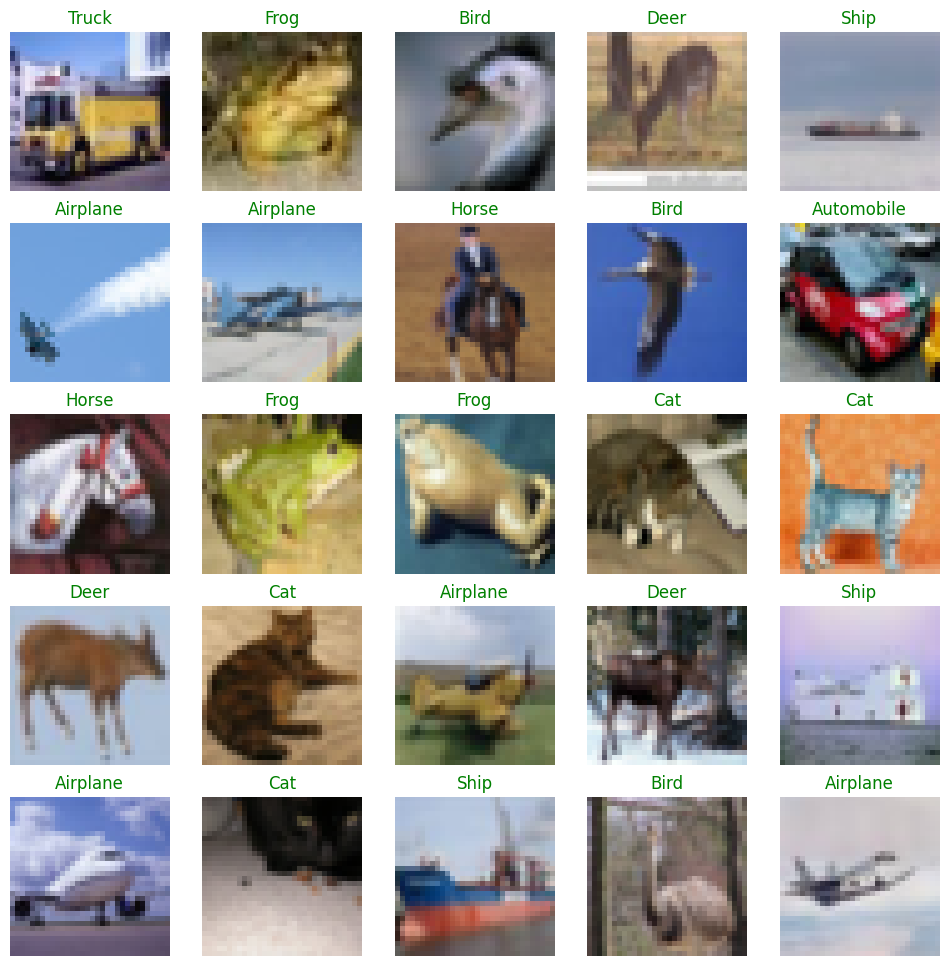

In [11]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
for i, j in enumerate(random.sample(range(len(X_test)), 25)):
    ax = axes[i//5][i%5]
    ax.imshow(X_test[j])
    actual_class_name = class_names[y_test[j].argmax()]
    predicted_class_name = class_names[y_test_preds[j].argmax()]
    title_color = "green"
    if y_test_preds[j].argmax() != y_test[j].argmax():
        ax.text(0, 2, actual_class_name, color='white', bbox=dict(facecolor='green'))
        title_color = "red"
    ax.set_title(predicted_class_name, color=title_color)
    ax.axis("off")

## Using custom function for plotting the results

In [12]:
from utils.utils import grid_plot

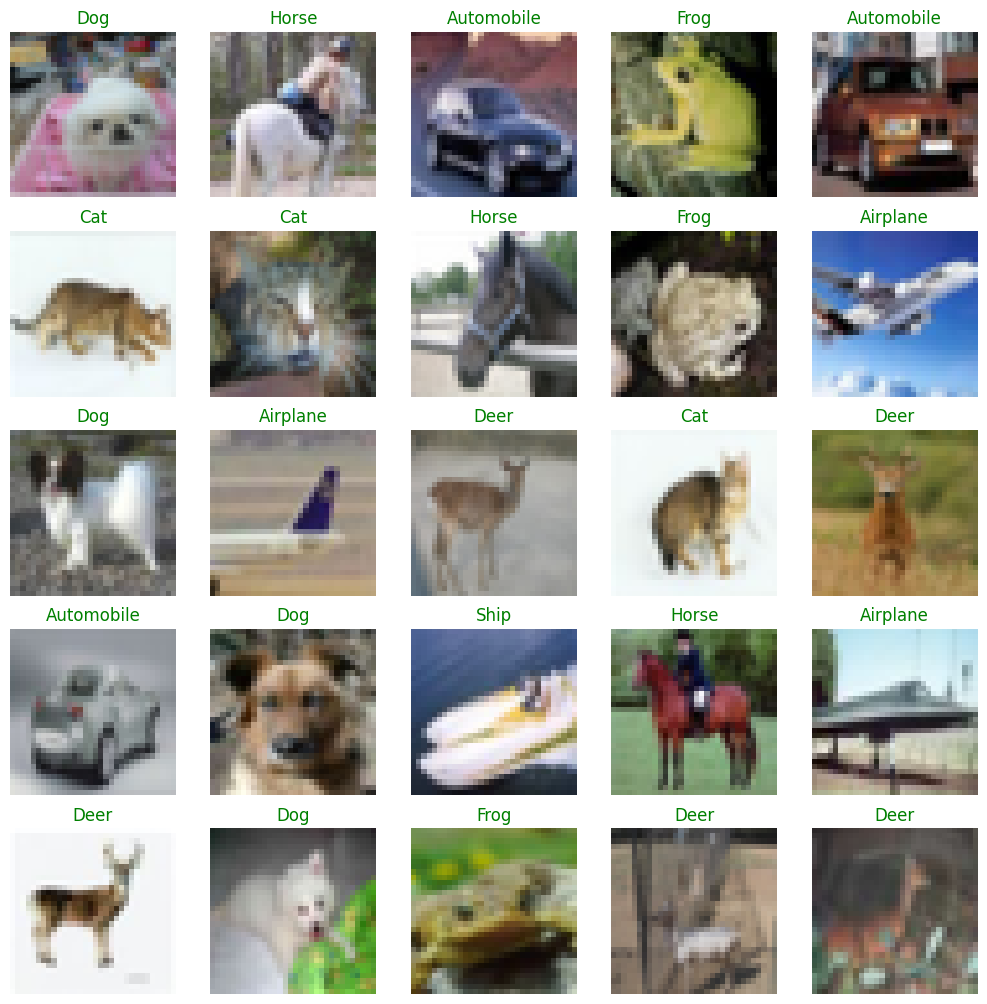

In [23]:
grid_plot(X_test, y_test, y_test_preds, class_names)